In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import squarify

In [86]:
# Load datasets
complaints_by_airport = pd.read_csv(r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\complaints-by-airport.csv")
complaints_by_category = pd.read_csv(r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\complaints-by-category.csv")
complaints_by_subcategory = pd.read_csv(r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\complaints-by-subcategory.csv")
iata_icao = pd.read_csv(r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\iata-icao.csv")

In [88]:
# Display the first few rows
display(complaints_by_airport.head())
display(complaints_by_category.head())
display(complaints_by_subcategory.head())
display(iata_icao.head())

,pdf_report_date,airport,year_month,count
0,2019-02,ABE,2015-01,0
1,2019-02,ABE,2015-02,0
2,2019-02,ABE,2015-03,0
3,2019-02,ABE,2015-04,0
4,2019-02,ABE,2015-05,2


,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
0,2019-02,ABE,Hazardous Materials Safety,2015-01,0,Hazardous Materials Safety,original
1,2019-02,ABE,Mishandling of Passenger Property,2015-01,0,Mishandling of Passenger Property,original
2,2019-02,ABE,Hazardous Materials Safety,2015-02,0,Hazardous Materials Safety,original
3,2019-02,ABE,Mishandling of Passenger Property,2015-02,0,Mishandling of Passenger Property,original
4,2019-02,ABE,Hazardous Materials Safety,2015-03,0,Hazardous Materials Safety,original


,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False


,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477


In [89]:
# Merge complaints datasets with IATA/ICAO data on the 'airport' code
complaints_by_airport = complaints_by_airport.merge(iata_icao, left_on='airport', right_on='iata', how='left')
complaints_by_category = complaints_by_category.merge(iata_icao, left_on='airport', right_on='iata', how='left')
complaints_by_subcategory = complaints_by_subcategory.merge(iata_icao, left_on='airport', right_on='iata', how='left')

In [90]:
# Complaints by Airport
complaints_by_airport = complaints_by_airport[['pdf_report_date', 'airport_x', 'year_month', 'count', 
                                               'country_code', 'region_name', 'latitude', 'longitude']]
complaints_by_airport = complaints_by_airport.rename(columns={'airport_x': 'airport'})

# Complaints by Category
complaints_by_category = complaints_by_category[['pdf_report_date', 'airport_x', 'category', 'year_month', 'count', 
                                                 'clean_cat', 'clean_cat_status', 'country_code', 
                                                 'region_name', 'latitude', 'longitude']]
complaints_by_category = complaints_by_category.rename(columns={'airport_x': 'airport'})

# Complaints by Subcategory
complaints_by_subcategory = complaints_by_subcategory[['pdf_report_date', 'airport_x', 'category', 'subcategory', 
                                                       'year_month', 'count', 'clean_cat', 'clean_subcat', 
                                                       'clean_cat_status', 'clean_subcat_status', 
                                                       'country_code', 'region_name', 'latitude', 'longitude']]
complaints_by_subcategory = complaints_by_subcategory.rename(columns={'airport_x': 'airport'})

In [91]:
# Verify that data is properly cleaned
print("Complaints by Airport dtypes:\n", complaints_by_airport.dtypes)
print("\nComplaints by Category dtypes:\n", complaints_by_category.dtypes)
print("\nComplaints by Subcategory dtypes:\n", complaints_by_subcategory.dtypes)

Complaints by Airport dtypes:
 pdf_report_date     object
airport             object
year_month          object
count                int64
country_code        object
region_name         object
latitude           float64
longitude          float64
dtype: object

Complaints by Category dtypes:
 pdf_report_date      object
airport              object
category             object
year_month           object
count                 int64
clean_cat            object
clean_cat_status     object
country_code         object
region_name          object
latitude            float64
longitude           float64
dtype: object

Complaints by Subcategory dtypes:
 pdf_report_date         object
airport                 object
category                object
subcategory             object
year_month              object
count                    int64
clean_cat               object
clean_subcat            object
clean_cat_status        object
clean_subcat_status     object
country_code            object
region_

# VISUALS

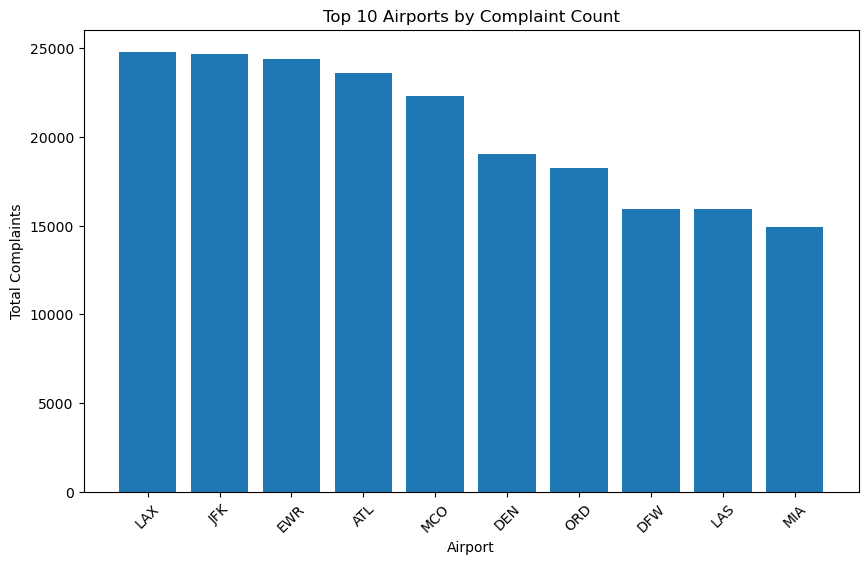

In [92]:
# Top 10 Airports by Complaint Count
top_airports = complaints_by_airport.groupby('airport')['count'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_airports.index, top_airports.values)
plt.title('Top 10 Airports by Complaint Count')
plt.xlabel('Airport')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45)
plt.show()

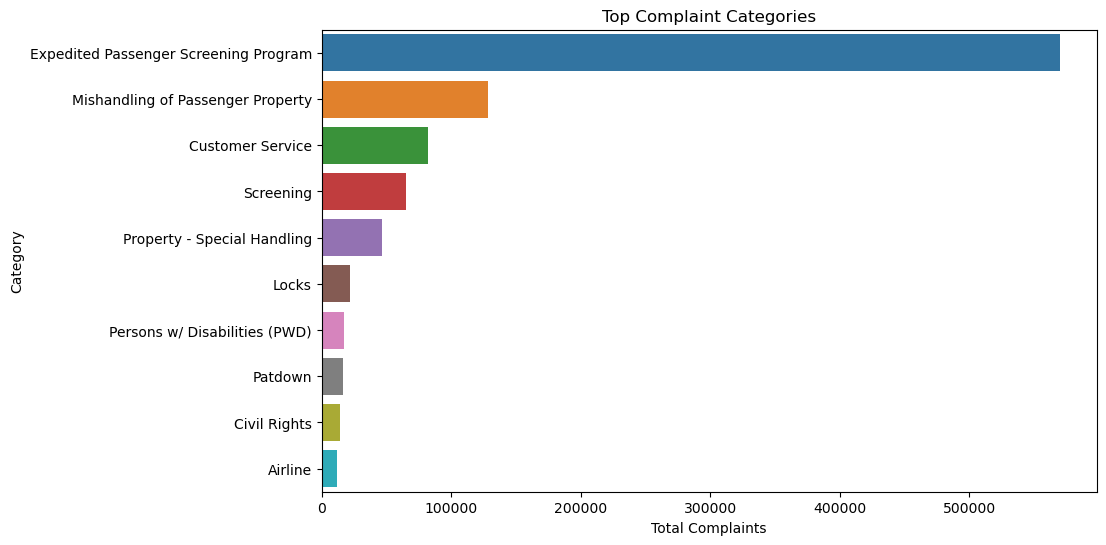

In [93]:
# Top Complaint Categories
top_categories = complaints_by_category.groupby('category')['count'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top Complaint Categories')
plt.xlabel('Total Complaints')
plt.ylabel('Category')
plt.show()

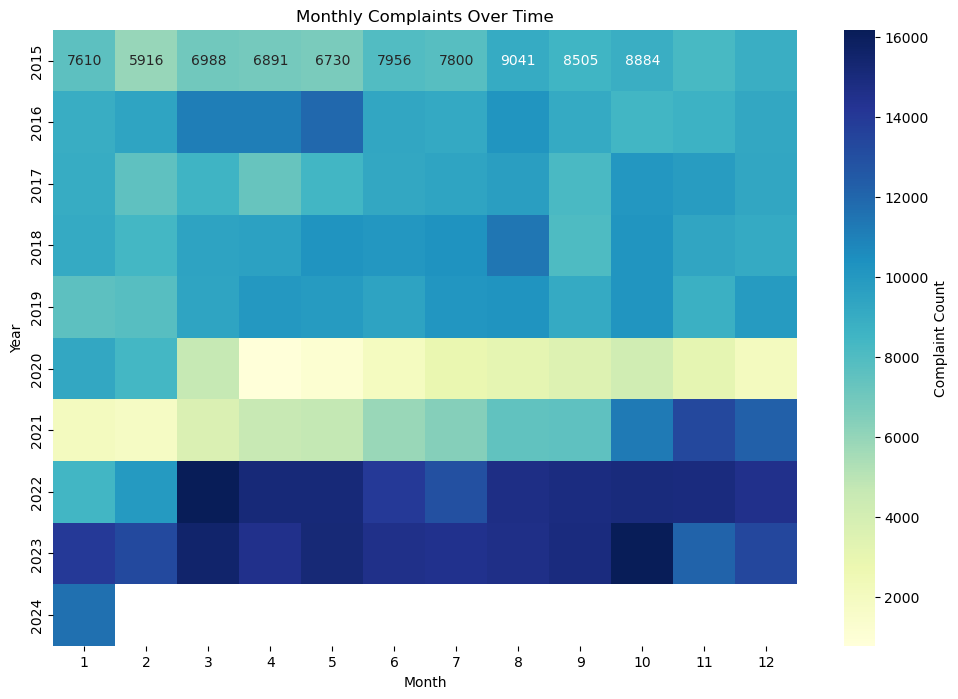

In [96]:
# Convert 'year_month' to datetime format
complaints_by_time = complaints_by_airport.copy()
complaints_by_time['year_month'] = pd.to_datetime(complaints_by_time['year_month'], errors='coerce')

# Extract the year and month
complaints_by_time['year'] = complaints_by_time['year_month'].dt.year
complaints_by_time['month'] = complaints_by_time['year_month'].dt.month

# Aggregate complaints by year and month
monthly_complaints = complaints_by_time.groupby(['year', 'month'])['count'].sum().unstack()

# Plot the heat map with adjusted annotation format
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_complaints, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Complaint Count'})
plt.title('Monthly Complaints Over Time')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

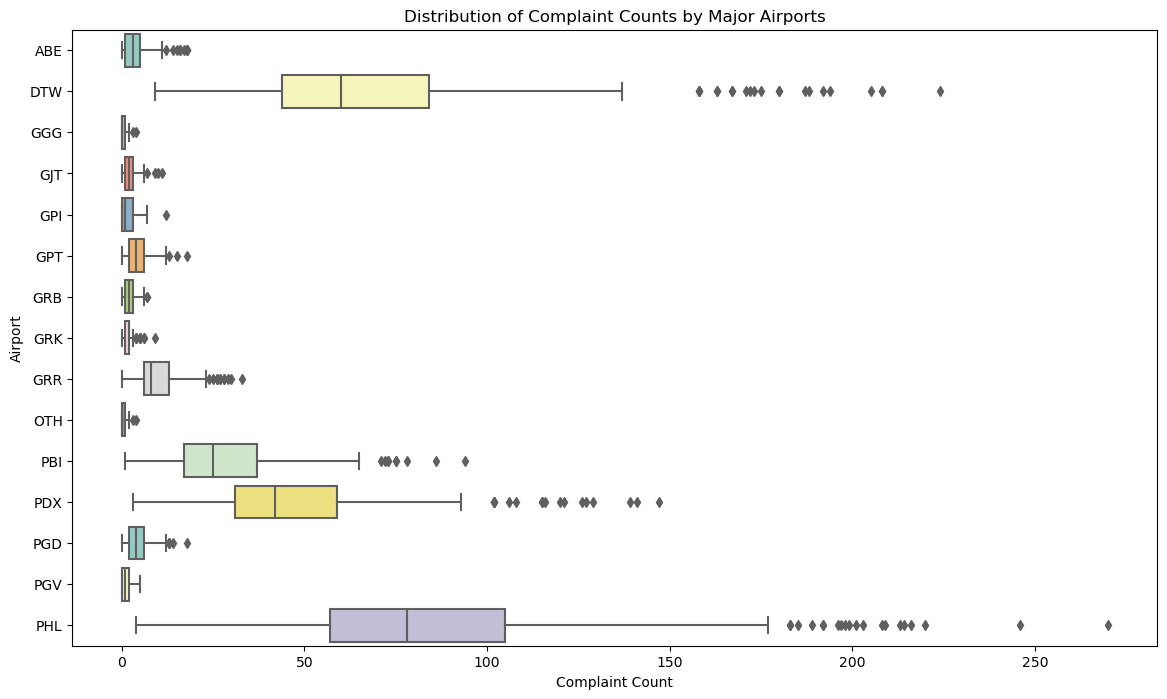

In [97]:
# Filter for airports with significant data
top_airports = complaints_by_airport['airport'].value_counts().nlargest(15).index
filtered_complaints_airport = complaints_by_airport[complaints_by_airport['airport'].isin(top_airports)]

# Plot the box plot for complaints by airport
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_complaints_airport, x='count', y='airport', orient='h', palette='Set3')
plt.title('Distribution of Complaint Counts by Major Airports')
plt.xlabel('Complaint Count')
plt.ylabel('Airport')
plt.show()

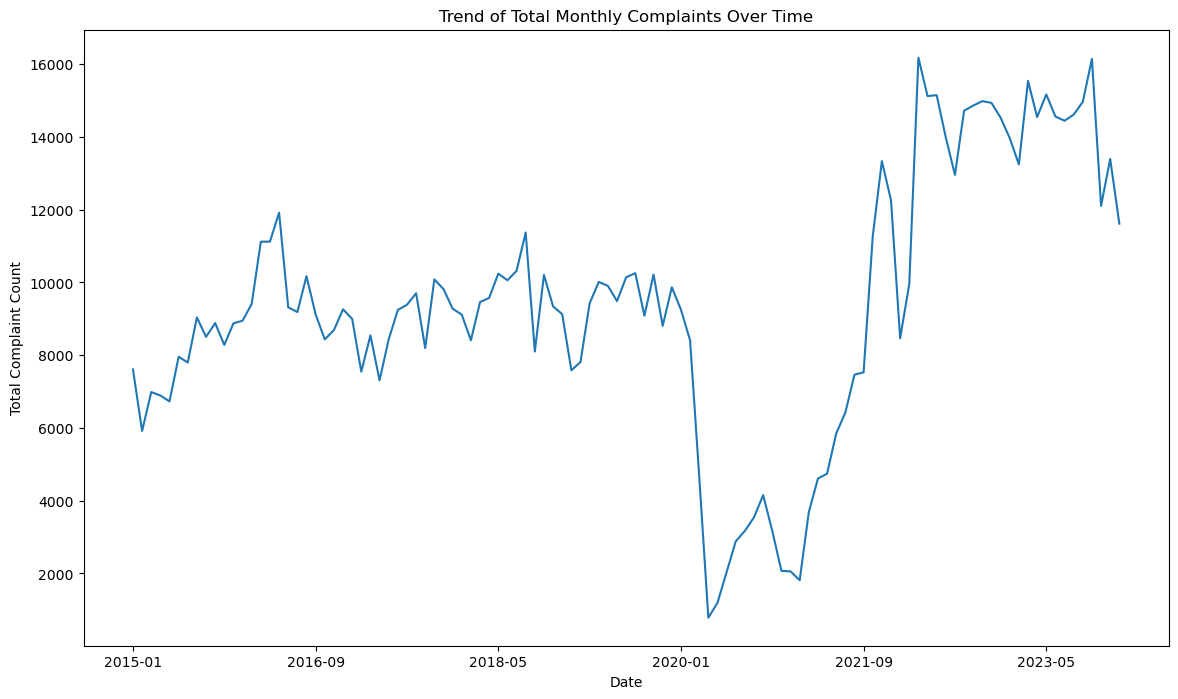

In [98]:
# Aggregate total complaints by month
monthly_trends = complaints_by_airport.groupby('year_month')['count'].sum()

# Plot the time series of total monthly complaints
plt.figure(figsize=(14, 8))
monthly_trends.plot()
plt.title('Trend of Total Monthly Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Total Complaint Count')
plt.show()

In [101]:
# Filter to airports with location data and aggregate complaints by airport
complaints_map_data = complaints_by_airport.dropna(subset=['latitude', 'longitude'])
complaints_map_data = complaints_map_data.groupby(['airport', 'latitude', 'longitude'])['count'].sum().reset_index()

# Create a base map centered on the United States
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add a marker cluster for better visualization of overlapping points
marker_cluster = MarkerCluster().add_to(m)

# Plot each airport on the map
for _, row in complaints_map_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=max(row['count'] / 500, 5),  # Adjust scale and ensure a minimum size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"{row['airport']}: {row['count']} complaints"
    ).add_to(marker_cluster)

# Save and display the map
m.save("complaints_map.html")
m